## Observations and Insights 

In [46]:
%matplotlib notebook

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data copy/Mouse_metadata.csv"
study_results_path = "data copy/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset (merge)
combined_mouse_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice in the DataFrame. 
combined_mouse_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_id_data = combined_mouse_data["Mouse ID"].value_counts()
timepoints_data = combined_mouse_data["Timepoint"].value_counts()
mouse_id_data


g989    13
g288    10
a699    10
a203    10
t198    10
        ..
u153     1
h428     1
f932     1
v199     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [50]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_dup_data = mouse_id_data.add(timepoints_data, fill_value=0)
mouse_dup_data

0       250.0
5       238.0
10      223.0
15      207.0
20      195.0
        ...  
z435      3.0
z578     10.0
z581     10.0
z795     10.0
z969     10.0
Length: 259, dtype: float64

In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_mouse = combined_mouse_data.drop_duplicates(["Mouse ID"])
drop_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [52]:
# Checking the number of mice in the clean DataFrame.
drop_dup_mouse.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_mouse = drop_dup_mouse["Tumor Volume (mm3)"].mean()
mean_mouse

median_mouse = drop_dup_mouse["Tumor Volume (mm3)"].median()
median_mouse

var_mouse = np.var(drop_dup_mouse ["Tumor Volume (mm3)"], ddof=0)
var_mouse

stand_mouse = np.std(drop_dup_mouse ["Tumor Volume (mm3)"], ddof=0)
stand_mouse

sem_mouse = st.sem(drop_dup_mouse["Tumor Volume (mm3)"], ddof=0)
sem_mouse


# This method is the most straightforward, creating multiple series and putting them all together at the end.

0.0

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

In [96]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# sample_mouse_x = drop_dup_mouse.sample(10)
# sample_mouse_x


# x_axis = np.arange(len(sample_mouse_x["Mouse ID"]))
# y_axis = sample_mouse_x["Timepoint"]

# plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
# plt.show()
# plt.tight_layout()

# x_axis = np.arange(len(drop_dup_mouse["Mouse ID"]))
# y_axis = drop_dup_mouse["Timepoint"]

# plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
# plt.show()
# plt.tight_layout()

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["Mouse ID"])


In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pandas






<IPython.core.display.Javascript object>


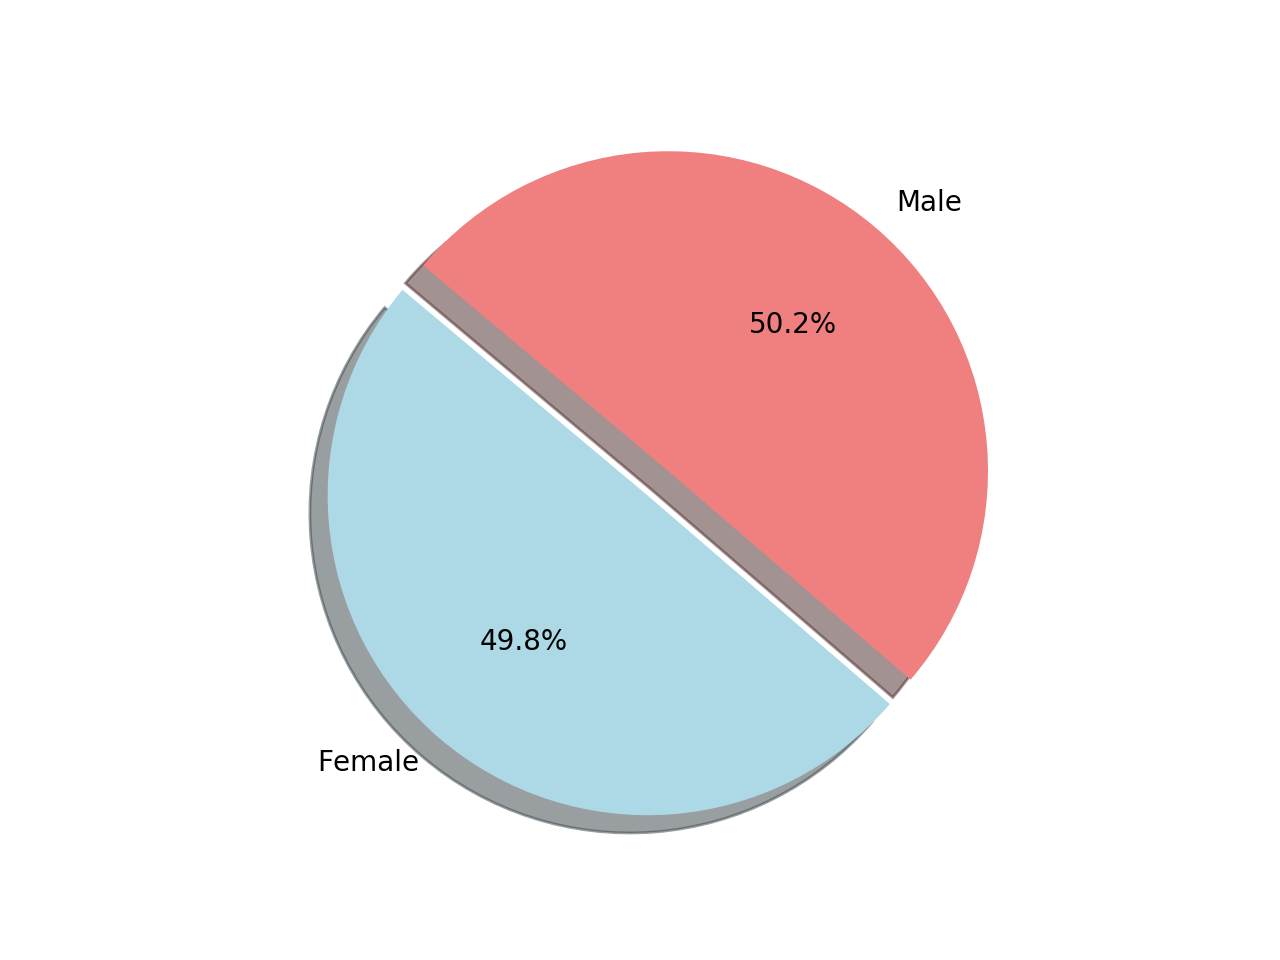

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = drop_dup_mouse.groupby("Sex")
total_gender = gender.count()

labels = ["Female", "Male"]
sizes = [124, 125]
colors = ["lightblue", "lightcoral"]
explode = [0.1,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
